In [9]:
import numpy
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# Calculating error bars for Bernoulli random variables

<b> This is an example of a not particularly good portfolio report.  The student has tried to do an investigation that is not on one of the prescribed topics.  What they have done, however, is simply rehashed the material that is covered in the blockly exercises.  To be clear, the report is not terrible and would probably score something on the 2.1/1st borderline.  It just isn't going to get into high first territory because it is really solving a non-problem. </b>

<b> To be clear, the text in bold should not be copied into your report.  This supplemental text is there to explain to you how my thinking has been structured. </b>

## Statement of the problem

<b> Use this section to introduce the problem that you are working on.  You should try in this section to restate the purpose of the assignment in your own words. </b>

There are three different ways that we might calculate an error bar when we perform an experiment that involves doing $N$ Bernoulli trials and inferring something about the parameter $p$ of the random variable.  Two of these methods rely on the formula for a confidence limit:
$$
p_c = 2 \Phi\left( \frac{\epsilon}{\sigma/\sqrt{N}} \right) - 1
$$
and essentially only differ in the way we estimate $\sigma$.  The last of these involves the method known as bootstrapping.  In this report I will compare these methods and discuss how these three different methods work.

## Research

<b> Use this section to discuss the research that you did when preparing your report.  Include a list of references that you consulted and discuss the various exercises from the mathNET website that you worked through and how they shaped your understanding of the problem. </b>

Prior to writing this report I worked through the following blockly exercises:

- http://gtribello.github.io/mathNET/random-variables-exercise.html
- http://gtribello.github.io/mathNET/central-limit-theorem-exercise.html

The first of these exercise taught me about how to write generate Bernoulli random variables.  The second of these exercises introduced me to the notion of a confidence limit.  In converting what I learnt from the blockly exercises to python I consulted the following resources:

- http://introtopython.org/lists_tuples.html
- https://matplotlib.org/users/pyplot_tutorial.html
- https://plot.ly/matplotlib/histograms/

From the first of these resources I learnt more about how to use lists in python and from the second I learnt how to use the matplotlib libraries to plot functions.  The last exercise provided an example of how to construct a histogram using the intrinsic functions that are part of matplotlib.

To understand the central limit theorem I consulted the following resources:

- http://gtribello.github.io/mathNET/resources/jim-chap11.pdf
- http://gtribello.github.io/mathNET/central-limit-theorem-video.html

The following video provided an explaination for the origin of the Bessel correction to the sample variance:

- http://gtribello.github.io/mathNET/error_bar_video.html

Lastly, the following resources were useful for understanding the bootstrapping technique:

- https://www.youtube.com/watch?v=655X9eZGxls
- https://www.youtube.com/watch?v=nslY1s0U9_c
- https://en.wikipedia.org/wiki/Bootstrapping
- https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading24.pdf

## Theory

<b> Use this section to discuss any theory that is relevant to the subject of your report. This theory should have been discovered when you performed your research.  Break your theory section into suitable subsections as I have done below.  </b> 

Let's suppose that we generate $N$ identical and independent random variables.  If we call each of these random variables $X_i$ we can calculate the sample mean, $\mu$, using:
$$
\mu = \frac{1}{N} \sum_{i=1}^N X_i
$$
As this quantity $\mu$ is calculated by summing a set of $N$ random variables it is itself random.  There is thus an associated cumulative probability distribution function for this random quantity.  More importantly, however, if we were to generate a second different set of $N$ identical and independent random variables the value that we would get for $\mu$ from this second set of experiments would not equal the value that we got from our first set of experiments. In statistics, we thus often choose, when we quote sample means, to quote the value the estimate of the sample mean that we got from our experiment together with a range of values that our estimate of the would fall into in 90% of any repeat experiments that we might perform in the future.  This range is referred to as the error bar on our estimate of the sample mean.

### Methods based on the central limit theorem

From the central limit theorem we know if we calculate the sample mean from sufficiently large number of independent and identical random variables with finite expectation and variance the cumulative probabiltiy distribution function for the distribution of the sample mean is a Gaussian with a mean and variance that we know.  In estimating the error bars we thus will often choose to therefore assume that our estimate of the sample mean represents a sample from a normal distribution.  Furthermore, as we have an analytic expression for the cumulative probability distribution function for this variable we can derive the following expression that relates the degree of confidence we have in our estimate, $p_c$, to a particular range of values around the mean, $\epsilon$, and the number of experiments, $N$, that  we performed:
$$
p_c = 2 \Phi\left( \frac{\epsilon}{\sigma/\sqrt{N}} \right) - 1
$$
Rearranging this expression we arrive at the following expression for the range, $\epsilon$, around our sample mean that the true expectation has a probability of $p_c$ of being in.  
$$
\epsilon = \frac{\sigma}{\sqrt{N}} \Phi^{-1}\left( \frac{p_c + 1}{2} \right)
$$
To use this expression, however, we have to have an estimate of the variance, $\sigma^2$ for our random variable.

### Methods based on bootstrapping

We can use bootstrapping to estimate an error bar instead of using the technique described in the previous short section.  The advantage of this technique is that we do not need to make any assumption about the distribution of the parameter that we are trying to fit.  In other words, we do not have to assume that our estimate of the sample mean represents a sample from a normal random variable.  We can thus use bootstrapping even when the sample size is relatively small and the central limit theorem does not hold.

The essence of the bootstrapping technique is a recognition that by calculating the parameter/s of the random variable we have fitted the probability distribution function for that random variable.  We can thus build samples from the fitted random variable and investigate the properties of the distribution of fitted parameters that we obtain.  To build a bootstrap estimate of the error bar for a Bernoulli random variable we would thus proceed as follows:

- Calculate the sample mean $\mu^*$ from our sample of $N$ bernoulli random variables.
- Generate $K$ sets of $N$ bernoulli random variables from a Bernoulli distribution with parameter $\mu^*$.
- Calculate the sample mean for each of the $K$ sets of $N$ bernoulli random variables that were generated in step 2.
- Sort the estimates of the sample mean that we got from the previous step.  If we have 200 bootstrap samples we can use the value of the 5th lowest of these estimates, $\mu_5$, and the 195th lowest, $\mu_{195}$ to estimate the 95% confidence limits as $2\mu^* - \mu_5$ and $2\mu^* - \mu_{95}$, where $\mu^*$ is our original estimate for the parameter.  

In short, what we are doing when we use the bootstrapping technique is we are building a set of samples for what value our estimate might have taken if the true value of our sample mean was equal to the estimate that we obtained from our sample.  In other words, we are building a model for the distribution of the sample mean by sampling and extracting our confidence limits from the information we have on the distribtion.

## Software

<b> Use this section to discuss the software that you have written to solve the problem. </b>

### Generating random variables

To investigate the various different methods we have for calculating confidence limits I wrote the following function to generate Bernoulli random variables.  I then generated 100 Bernoulli random variables with parameter 0.4 and estimated the sample mean.  As you can see the estimate of the sample mean that I obtain from this experiment is substantially different to the true expectation.

In [30]:
def bernoulli(p) :
    if numpy.random.uniform(0,1)<p : return 1
    return 0

nsamples, mean = 100, 0.
for i in range(nsamples):
    mean = mean + bernoulli(0.4)
    
mean = mean / float(nsamples)
print( mean )

0.47


# Method 1: Using what I know about the variance of a Bernoulli random variable

I know that the variance of a bernoulli random variable, $X$, is given by:
$$
\textrm{var}(X) = p(1-p)
$$
I can argue that the number of sucesses, $n$, that I get when I generate $M$ bernoulli random variables is a Binomial random variable.  The probability for getting exactly $n$ sucesses is thus:
$$
P(N=n) = \binom{M}{n} p^n(1-p)^{M-n}
$$
I now want to set $p$ so that the $n$ is the most likely value of this random variable.  In other words, I want to find optimum of the function above.  I can make this calculation simpler by taking the logarithm of both sides:
$$
\log\left[ P(N=n) \right] = \log\left[\binom{M}{n}\right] + n\log(p)  + (M-n)\log(1-p)
$$
This does not affect the position of the maximum as the logarithm is a monotonically increasing function.  Differentiating the expression above with respect to $p$ gives:
$$
\frac{ \textrm{d} \log\left[ P(N=n) \right]}{\textrm{d} p} = \frac{n}{p} - \frac{M-n}{1-p}  
$$
At the optimum this derivative must be equal to zero so we thus have:
$$
\frac{n}{p} - \frac{M-n}{1-p} = 0 \quad \rightarrow \quad \frac{n}{p} = \frac{M-n}{1-p} \quad \rightarrow \quad \frac{n}{p} - n = M - n \qquad \rightarrow \quad p = \frac{n}{M}
$$
In other words, the most likely value for the parameter, $p$, of my Bernoulli random variable is the sample mean, $\mu$.  I might therefore be tempted to calculate the variance as
$$
\sigma^2 = \mu(1-\mu)
$$
This is what I have done in the cell below.  I have then inserted the value that I obtained for the variance into the expression for the confidence limit can be derived by assuming that the distribution of this quantity is Gaussian (in accordance with the central limit theorem).  I can thus arrive at a final value for my sample mean and and associated confidence limit.

In [31]:
sigma = math.sqrt( mean*( 1-mean ) )

conf = ( sigma / math.sqrt( nsamples ) )*norm.ppf( 0.5*(0.95 + 1) )

print( mean, conf )

0.47 0.0978216434249


# Method 2: Calculate the sample variance

From the first year I know that the variance for a sample of $N$ arbitrary random variables, $X_i$, should be calculated using:
$$
\sigma^2 = \frac{1}{N-1} \sum_{i=1}^N ( X_i - \mu )^2 
$$
where $\mu$ is the sample mean, which is calculated using:
$$
\mu = \frac{1}{N-1} \sum_{i=1}^N X_i 
$$
I can insert this second expression into the first expression for $\sigma^2$ and, with some suitable manipulations, thus arrive at:
$$
\sigma^2 = \frac{N}{N-1} \left[ \frac{1}{N}\sum_{i=1}^N X_i^2 - \left(\frac{1}{N}\sum_{i=1}^N X_i\right)^2 \right]
$$
Consider, this expression for a Bernoulli random variable, however.  Each of the individual $X_i$ values is either 0 or 1 and consequently $\sum_{i=1}^N X_i^2 = \sum_{i=1}^N X_i = \mu$.  I can thus rewrite the above as:
$$
\sigma^2 = \frac{N}{N-1} ( \mu - \mu^2 )
$$
which is nothing more than the estimate of the variance that we calculated in the previous section multiplied by the Bessel correction.  This correction factor of $\frac{N}{N-1}$ is required to deal with the fact that the $\mu$ that we used when we calculate the variance is not, as it should be, the true expectation but is instead the sample mean i.e. an estimate of the expectation.  We should therefore always multiply the estimate of the variance that we get by inserting the value of $\mu$ that we get from our sample by this correction factor.  The long and short of this is that the method that we used in the previous section underestimates the variance by neglecting this Bessel term.  In the cell below we thus recalculate the confidence limits taking this factor into account and obtain the following:

In [32]:
sigma2 = ( nsamples / ( nsamples - 1) )*( mean - mean*mean )
sigma = math.sqrt( sigma2 )
conf = ( sigma / math.sqrt( nsamples ) )*norm.ppf( 0.5*(0.95 + 1) )

print( mean, conf )

0.47 0.0983144507928


### Method 3: Bootstrapping

As I discussed in the theory section the methods that we have used thus far all work by assuming that our estimate for the sample mean is a sample from a normal random variable, which is justified based on the central limit theorem.  In this final method of bootstrapping we make no such assumption.  Instead, what we do is we assume that our esimate of the $p$ parameter is the correct one.  We then take multiple sets of $N$ samples from a Bernoulli random variable with this parameter and estimate a sample mean from each of these sets of random variables.  By repeating this procedure multiple times we can construct a probability distribution for the parameter $p$.  This is what is done in the cell below.  We calculate 200 samples of 100 Bernoulli random vairables with parameter $p=\mu$.  To illustrate the distribution of these samples I have then plotted a histogram.

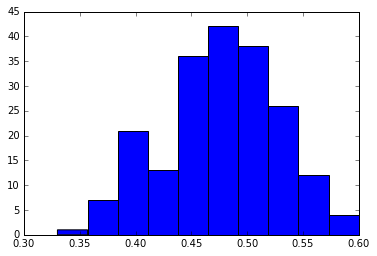

In [33]:
def bsample() :
    bmean = 0
    for i in range(nsamples) :
        bmean = bmean + bernoulli( mean )
    return bmean / float( nsamples ) 

nstraps, bootstraps = 200, []
for i in range(nstraps) :
    bootstraps.append( bsample() )
    
plt.hist( bootstraps )
plt.show()

The simple beauty of the bootstrap is that, because I have set of sample for the parameter, I can extract confidence limits directly from this sample.  For instance, I can extract the 95 % confidence limits by sorting my sample and by taking the 5th and 195th element of my sorted list of parameter values.  Obviously, the justification for doing this is that 95% of my samples fall within this particular range.  In the cell below I do just this for the data that I have just generated.

In [34]:
sorted_bootstraps = sorted( bootstraps )
print( sorted_bootstraps[4], mean, sorted_bootstraps[194] )

0.38 0.47 0.57


## Further considerations and extensions

<b> Use this section to discuss the assumptions in your approach and the limitations of your approach </b>

The data that I generated to demonstrate the bootstrap technique are samples from a Bernoulli random variable.  Obviously, different methods are required if the random variable sampled is not a Bernoulli random variable.  In addition, to use the statistical bootstrap to estimate confidence you really need access to a computer.  The method based on the central limit theorem is thus useful in order to get an estimate of the error bars.  